In [244]:
#the gene i found to be extremely different than others was EEF1A1

In [245]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

# get the path of the file of lecture1.ipynb
#notebook_path = os.path.dirname("top10genes.ipynb")
location_of_data = "/Users/rahuldwivedi/Downloads/ovariandata/"
rna_file_name = "ovadata_RNA_Seq_v2_expression_median.txt"
clinical_file_name = "data_clinical_patient.txt"

In [246]:
def read_rna_file(location, name_file):
    """
    input location: string, location of the file
    input name_file:string, name of the RNA seq file
    This file is tab seperated and includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
    Out put: panda data frame
    function: read the file and set the 'Hugo_Symbol', 'Entrez_Gene_Id' columns as index
    """

    import pandas as pd
    
    rna_file_path = location + name_file
    try:
        rna = pd.read_csv(rna_file_path,  sep='\t')
        
        #to make sure we do not process the name of genes we will convert them to string
        rna[['Hugo_Symbol', 'Entrez_Gene_Id']] = rna[['Hugo_Symbol', 'Entrez_Gene_Id']].astype(str)
        
        # make first two columns as indexx of data frame 
        rna =  rna.set_index([ 'Hugo_Symbol','Entrez_Gene_Id']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or two columns 'Hugo_Symbol', 'Entrez_Gene_Id' do not exist")
        print("***************")
    
    return rna

In [247]:
def read_clinical_file(location, name_file):
    """
    input location: string, location of the file
    input name_file:string, name of the clinical file
    This file is tab seperated and includes the column of 'PATIENT_ID' in the 5th row
    Out put: panda data frame
    function: read the file, skip first four rows, and set 'PATIENT_ID' as index
    """

    import pandas as pd
    
    clinical_file_path = location + name_file
    try:
        clinical_data = pd.read_csv(clinical_file_path,  sep='\t', skiprows=4)
        
        # make first the column PATIENT_ID as indexx of data frame 
        clinical_data =  clinical_data.set_index([ 'PATIENT_ID']) 
        
    except:
        print("***************")
        print("the location of file is not correct, or the column '#Patient Identifier' does not exist")
        print("***************")
    
    return clinical_data

In [248]:
rna = read_rna_file(location_of_data, rna_file_name)
clinical = read_clinical_file(location_of_data, clinical_file_name)

In [271]:
rna.head()

TCGA-04-1348-01  TCGA-04-1357-01  TCGA-04-1362-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             22.028266        17.671802        21.976720   
            100134869             25.716221        20.473921        29.909980   
            10357                321.241331       128.865135       424.021806   
            10431               1952.678661       901.425735      1366.864827   
            155060               222.150613       244.412320       377.449014   

                            TCGA-04-1364-01  TCGA-04-1365-01  TCGA-04-1514-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             14.940150        10.382058         2.733694   
            100134869              7.827355         4.877826         6.227180   
            10357                400.227877       891.927121       380.425710   
            10431               1775.819439      1886.589299      1371.327702   
            155060               339.460985       128.196713       396.171828   

                            TCGA-04-1519-01  TCGA-09-0364-01  TCGA-09-0366-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             19.315232        20.896304         5.421443   
            100134869             15.088948        27.821347        10.171431   
            10357                507.815414       856.606003       371.023437   
            10431               1525.885484       721.340307      1070.351388   
            155060                89.765797       586.616738       314.560329   

                            TCGA-09-0367-01       ...         TCGA-61-2102-01  \
Hugo_Symbol Entrez_Gene_Id                        ...                           
nan         100133144              1.190590       ...                4.923308   
            100134869             24.953771       ...                2.486953   
            10357                218.291376       ...              335.265779   
            10431               1392.102710       ...             1596.217812   
            155060               111.235044       ...              264.341700   

                            TCGA-61-2104-01  TCGA-61-2109-01  TCGA-61-2110-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144             20.466544        41.372838        20.519959   
            100134869             29.214073        43.867435        48.929509   
            10357                131.919622       305.443765        68.665161   
            10431               1128.424392      1026.626852      1172.472325   
            155060               687.011933       528.956140       570.717733   

                            TCGA-61-2111-01  TCGA-61-2113-01  TCGA-OY-A56P-01  \
Hugo_Symbol Entrez_Gene_Id                                                      
nan         100133144              7.149914        21.566391        32.307387   
            100134869              6.756215         8.630438        26.618719   
            10357                225.455747        92.597754       203.931820   
            10431               1142.036809      1291.281828       588.503145   
            155060               228.074966       439.904885       510.841037   

                            TCGA-OY-A56Q-01  TCGA-VG-A8LO-01  TCGA-WR-A838-01  
Hugo_Symbol Entrez_Gene_Id                                                     
nan         100133144             26.118873        34.475700       126.819903  
            100134869             15.716029        28.912917        59.400754  
            10357                400.614342       309.174887       431.623999  
            10431               1304.656225      1345.236051      1460.986221  
            155060               387.776781       412.614342       540.597847  

[5 rows x 300 columns]

In [249]:
clinical.head()

,CANCER_TYPE_ACRONYM,AGE,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,ETHNICITY,FORM_COMPLETION_DATE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PERSON_NEOPLASM_CANCER_STATUS,RACE,GRADE,TISSUE_SOURCE_SITE,ANEUPLOIDY_SCORE
PATIENT_ID,,,,,,,,,,,,
TCGA-04-1331,OV,78.0,1224.0,-28848.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G3,4,7.0
TCGA-04-1332,OV,70.0,1247.0,-25786.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G3,4,15.0
TCGA-04-1335,OV,60.0,55.0,-21963.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,Black or African American,G2,4,6.0
TCGA-04-1336,OV,55.0,1495.0,-20271.0,NaN,5/11/09,NaN,Tumor Free,White,G3,4,7.0
TCGA-04-1337,OV,78.0,NaN,-28626.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G2,4,15.0


In [274]:
def normalizing_patients(df_rna_values):
    
    """
        input df_rna: rna-seq data frame that includes two columns of 'Hugo_Symbol', 'Entrez_Gene_Id'
            columns are patients, and rows are genes
        output df_normalized_rna: normalized (scaled) data
        function:  using pandas methods dividing the value of each gene for each patient 
                by the maximum value of that patient.
    """
    
    #finding maximum level expression of genes for each patient
    Max_each_patient = df_rna_values.max(axis=0)
    
    #Divide the values of each gene by the maximum value of gene expression of the same patient patient
    df_normalized_rna_values = df_rna_values.divide(Max_each_patient, axis=1)
    
    return df_normalized_rna_values

In [276]:
normalized_rna = normalizing_patients(rna)

In [252]:
def var_rna_data(df_rna):
    """
    input: rna data frame
    output: a data frame with index name of genes, with only one column variance of genes
    function: Finding variance of each gene, sort the data frame based on variance 
    """
    
    df_rna['Variance'] = df_rna.var(axis=1)
    
    df_rna_var = df_rna.sort_values(by ='Variance', ascending=0)
    
    top_10_var_rna = df_rna_var.head(10)

    return top_10_var_rna.drop(columns=['Variance'])

In [253]:
top_10_var_rna = var_rna_data(normalized_rna)
top_10_var_rna

,,TCGA-04-1348-01,TCGA-04-1357-01,TCGA-04-1362-01,TCGA-04-1364-01,TCGA-04-1365-01,TCGA-04-1514-01,TCGA-04-1519-01,TCGA-09-0364-01,TCGA-09-0366-01,TCGA-09-0367-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Hugo_Symbol,Entrez_Gene_Id,,,,,,,,,,,,,,,,,,,,,
IGF2,3481,0.009529,0.040637,0.493489,1.000000,0.019999,0.263283,0.181425,0.101218,0.207896,0.147513,...,1.000000,1.000000,0.095767,0.021363,0.343557,1.000000,0.008331,0.131071,0.623186,0.011817
COL1A1,1277,0.069028,0.144819,0.050296,0.011310,0.052526,0.370213,0.050363,0.078105,0.046857,0.011012,...,0.173149,0.161234,0.074614,0.119943,0.063996,0.652943,0.066334,0.002390,0.206158,0.100876
EEF1A1,1915,0.183659,0.658017,0.571312,0.164350,0.334952,1.000000,0.394201,0.505330,0.987982,0.757957,...,0.165689,0.470666,1.000000,0.863184,0.824683,0.205262,0.425473,0.780665,1.000000,0.972483
CLU,1191,0.028697,0.501043,0.086541,0.012596,0.105748,0.051734,1.000000,0.005457,0.061353,0.794264,...,0.002477,0.169096,0.189768,0.160835,0.121850,0.009617,0.300986,0.286619,0.474167,0.039481
H19,283120,0.197605,0.004170,0.000640,0.009681,1.000000,0.001265,0.003945,0.318906,0.290535,0.138049,...,0.001057,0.408360,0.002975,0.404771,1.000000,0.000548,0.004714,0.023266,0.001912,0.002038
GAPDH,2597,0.449789,0.359466,0.301870,0.050258,0.483308,0.540462,0.436799,1.000000,1.000000,1.000000,...,0.080884,0.161230,0.556849,1.000000,0.289351,0.459429,0.241899,0.228909,0.459514,1.000000
CD74,972,1.000000,1.000000,0.125584,0.004711,0.421103,0.030924,0.196997,0.004409,0.917782,0.493734,...,0.018807,0.227921,0.363208,0.148943,0.136654,0.113227,0.054254,0.018605,0.128630,0.044815
C3,718,0.131190,0.126835,0.068805,0.012590,0.073854,0.014514,0.040983,0.000710,0.373340,0.267672,...,0.005367,0.306740,0.205107,0.827699,0.068760,0.042242,0.078444,0.002556,0.179458,0.008237
RPL8,6132,0.145715,0.359117,0.368181,0.149953,0.298796,0.126203,0.384766,0.236084,0.196817,0.859646,...,0.047987,0.250901,0.417015,0.238669,0.110269,0.109465,0.173993,0.163474,0.699290,0.187121


In [254]:
#Droping Entrez_Gene_Id from index
top_10_var_rna = top_10_var_rna.reset_index(level='Entrez_Gene_Id', drop=True)
rna_top10 = top_10_var_rna.T #transpose
patient_id_rna = rna_top10.index #patient IDs in RNA file

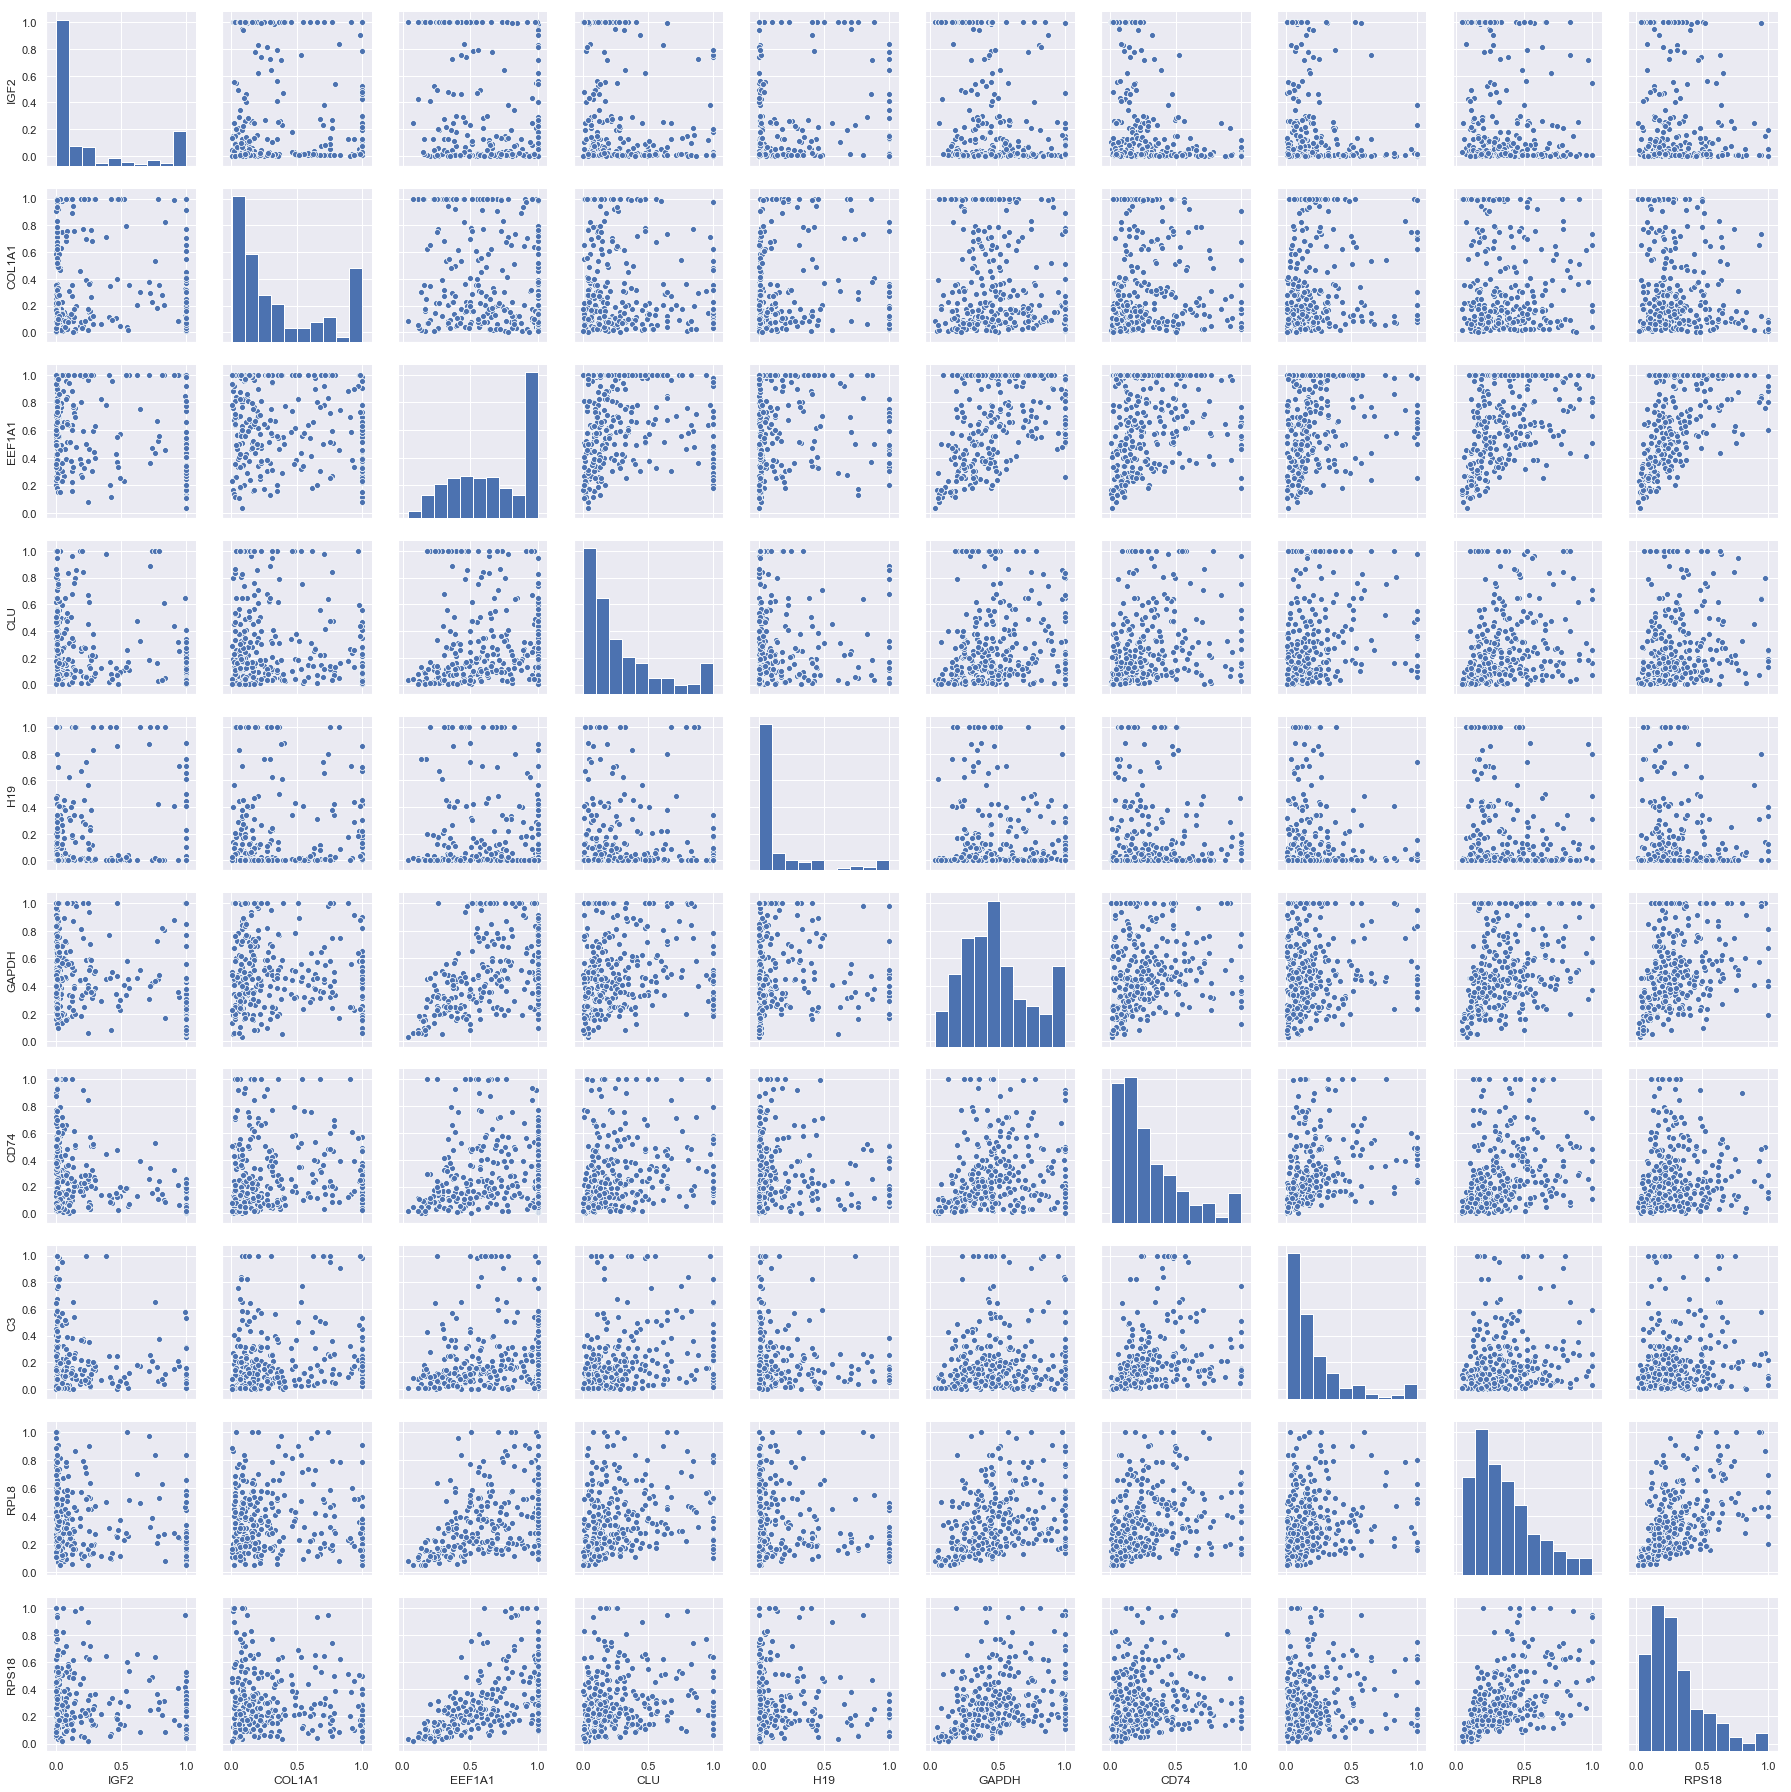

In [255]:
#correlation analysis of top 10 genes
sns.pairplot(rna_top10)

In [256]:
dic_patient_id = {id_:id_[:-3] for id_ in patient_id_rna}
rna_top10 = rna_top10.rename(dic_patient_id, axis='index')

In [257]:
clinical = pd.concat([clinical, rna_top10], axis=1, sort=False)

In [258]:
clinical.head()

,CANCER_TYPE_ACRONYM,AGE,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,ETHNICITY,FORM_COMPLETION_DATE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PERSON_NEOPLASM_CANCER_STATUS,RACE,GRADE,...,IGF2,COL1A1,EEF1A1,CLU,H19,GAPDH,CD74,C3,RPL8,RPS18
TCGA-04-1331,OV,78.0,1224.0,-28848.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1332,OV,70.0,1247.0,-25786.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1335,OV,60.0,55.0,-21963.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,Black or African American,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1336,OV,55.0,1495.0,-20271.0,NaN,5/11/09,NaN,Tumor Free,White,G3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-04-1337,OV,78.0,NaN,-28626.0,Not Hispanic Or Latino,3/26/09,NaN,With Tumor,White,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


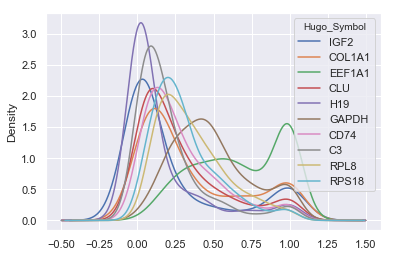

In [259]:
top10_genes = list(rna_top10)
rna_top10.plot.density()

In [260]:
patient_high_EEF1A1 = clinical[clinical["EEF1A1"]>0.75]
patient_high_EEF1A1.to_csv("patient_high_EEF1A1.csv")
patient_high_EEF1A1.head(100)

,CANCER_TYPE_ACRONYM,AGE,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,ETHNICITY,FORM_COMPLETION_DATE,NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT,PERSON_NEOPLASM_CANCER_STATUS,RACE,GRADE,...,IGF2,COL1A1,EEF1A1,CLU,H19,GAPDH,CD74,C3,RPL8,RPS18
TCGA-04-1514,OV,45.0,NaN,-16725.0,Not Hispanic Or Latino,6/2/09,NaN,Tumor Free,White,G2,...,0.263283,0.370213,1.000000,0.051734,0.001265,0.540462,0.030924,0.014514,0.126203,0.181827
TCGA-09-1659,OV,51.0,NaN,-18733.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G3,...,0.195477,0.077687,0.805094,0.251678,0.332350,0.812461,0.287418,0.217732,0.566184,1.000000
TCGA-09-1662,OV,58.0,NaN,-21246.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G3,...,0.000656,0.149153,1.000000,0.170658,0.013408,0.654294,0.247217,0.281891,0.391168,0.280995
TCGA-09-1666,OV,57.0,1752.0,-21066.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G3,...,0.000139,0.037910,1.000000,0.646797,0.002314,0.467774,0.331130,0.075515,0.605858,0.200648
TCGA-09-1667,OV,61.0,1882.0,-22306.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G2,...,0.014036,0.170974,1.000000,0.562705,0.067345,0.607928,0.335585,0.297447,0.208949,0.322496
TCGA-09-1669,OV,54.0,928.0,-20052.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G3,...,0.229783,0.388674,1.000000,0.063740,0.003536,0.586364,0.189577,0.046850,0.706331,0.640594
TCGA-09-1670,OV,57.0,547.0,-21147.0,NaN,6/2/09,NaN,With Tumor,White,G3,...,0.004543,0.053150,1.000000,0.521586,0.020038,0.439764,0.356164,0.755119,0.618153,0.219306
TCGA-09-1673,OV,50.0,92.0,-18599.0,Not Hispanic Or Latino,6/2/09,NaN,With Tumor,White,G3,...,0.054253,0.010354,0.885281,0.188572,0.397423,0.188762,0.127981,0.096655,0.200668,1.000000
TCGA-09-2044,OV,77.0,186.0,-28231.0,Not Hispanic Or Latino,11/2/09,NaN,Tumor Free,Asian,G3,...,0.083133,0.035493,0.840546,0.185732,0.002023,1.000000,0.222733,0.165660,0.200415,0.269484
TCGA-09-2051,OV,42.0,1919.0,-15650.0,Not Hispanic Or Latino,11/3/09,NaN,Tumor Free,White,G3,...,0.073754,0.132932,1.000000,0.489195,0.000339,0.721828,0.659226,0.511320,0.373157,0.282310


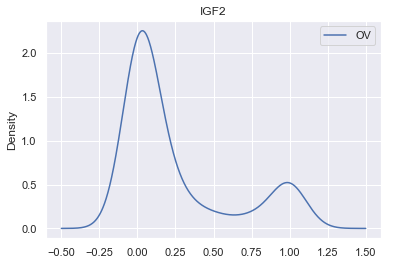

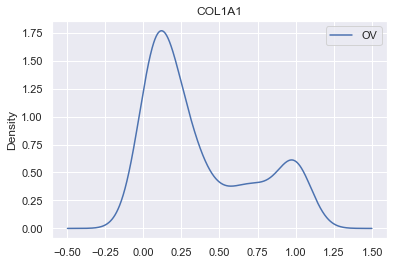

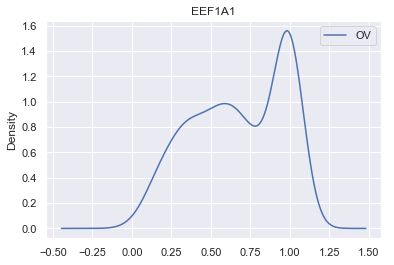

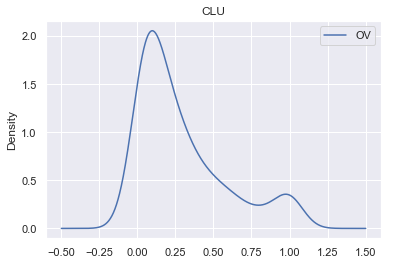

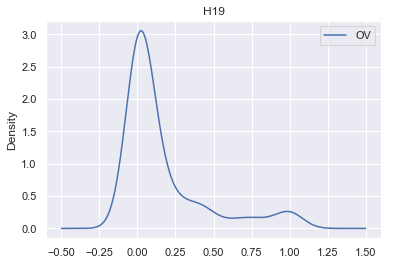

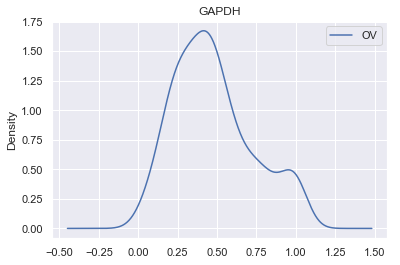

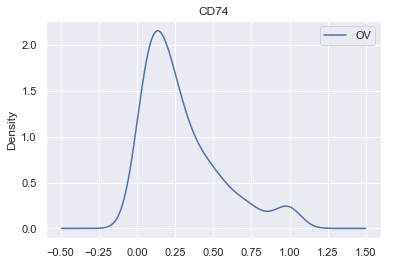

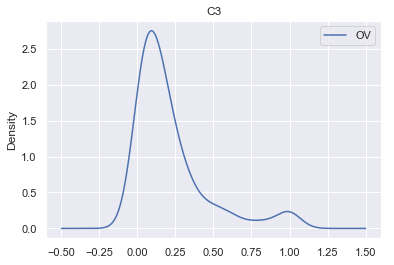

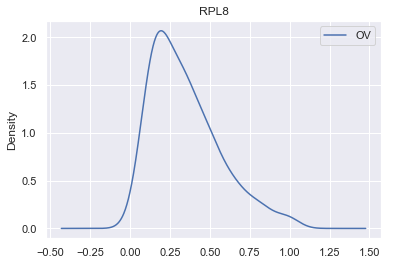

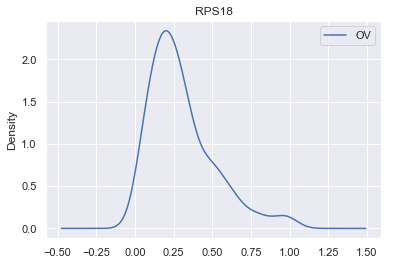

In [263]:
clinical_type={}

sub_types = ['OV']

for sub_type in sub_types:
    clinical_type[sub_type]= clinical[(clinical['CANCER_TYPE_ACRONYM']== sub_type) & (clinical['AGE']<100) ]
    
for gene in top10_genes:      
    for sub_type in sub_types:
        clinical_type[sub_type][gene].plot.density(label=sub_type)
    plt.legend()
    plt.title(gene)
    plt.show()

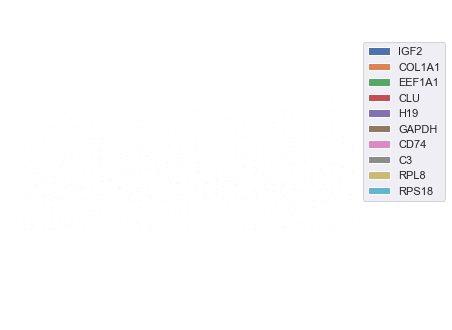

In [264]:
rna_top10.plot.bar(stacked=True)
plt.axis('off')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [265]:
def scater_box_plot(clinical, top10_genes, feature, hue=None):
    """
    input: 
        clinical: clinical is data frame that includes the vaues of top10_genes
        top10_genes: the list of gene names that are the name of some columns in clinical
        feature: a string; the name of one of columns in the clinical data frame
    output: Box plots for each gene in the top10_genes based on the categories of the given feature
    """
    import seaborn as sns
    sns.set(rc={'figure.figsize':(8,5)})
    for gene in top10_genes:
        ax = sns.boxplot(x=feature, y=gene, data=clinical, color='w')
        ax = sns.swarmplot(x=feature, y=gene, data=clinical, hue = hue,  palette="bright")
        plt.xticks(rotation=90)
        if hue: plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.show()

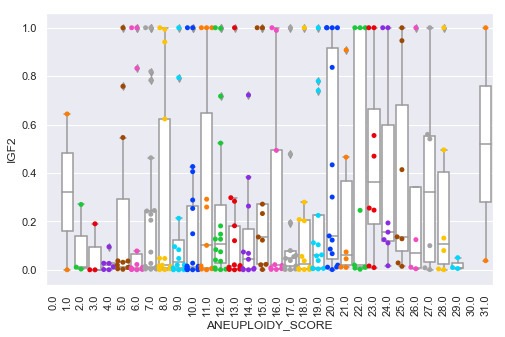

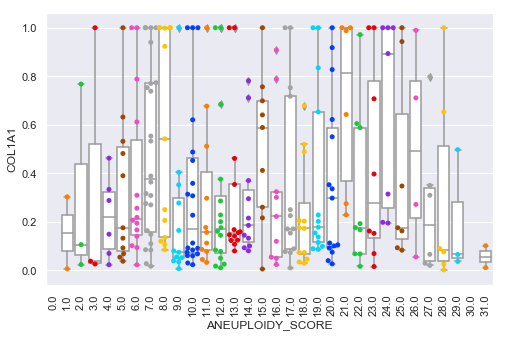

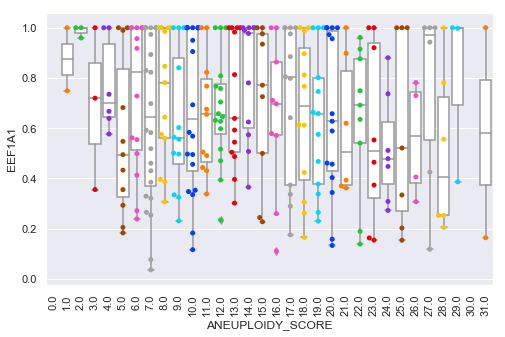

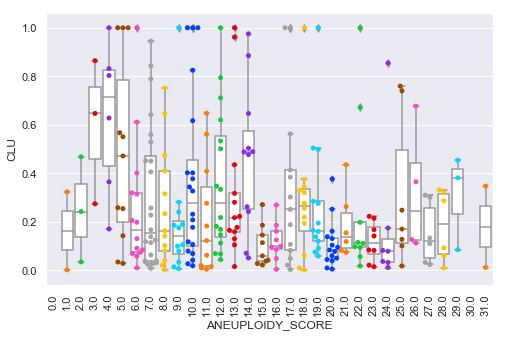

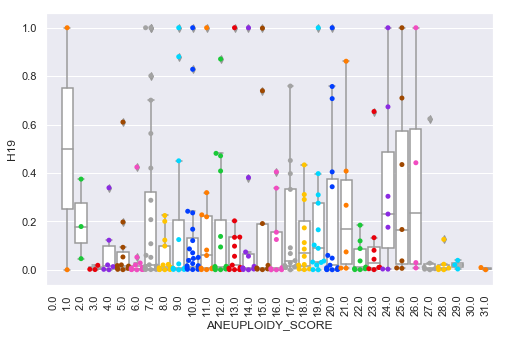

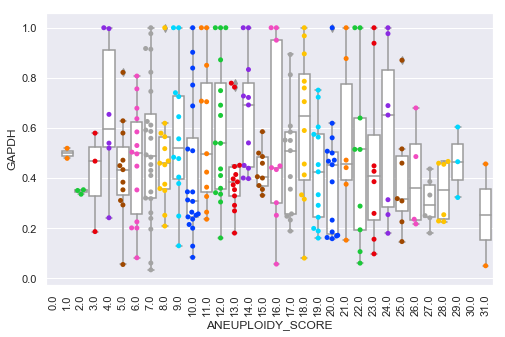

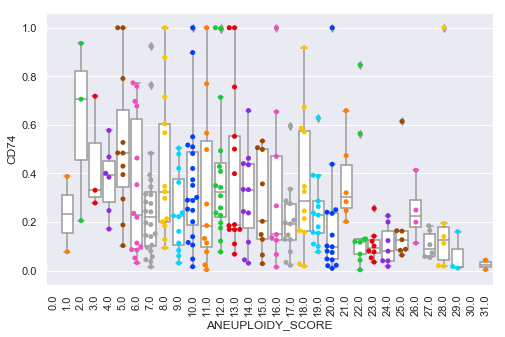

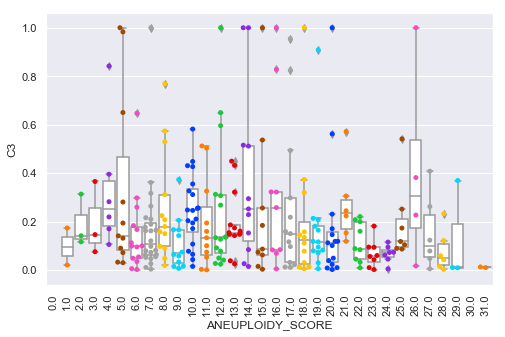

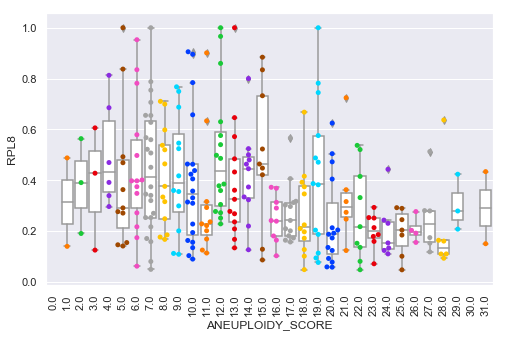

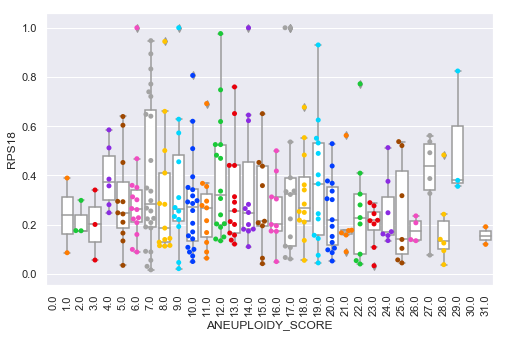

In [267]:
scater_box_plot(clinical, top10_genes, 'ANEUPLOIDY_SCORE')

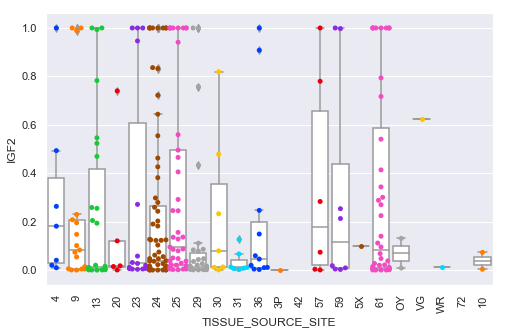

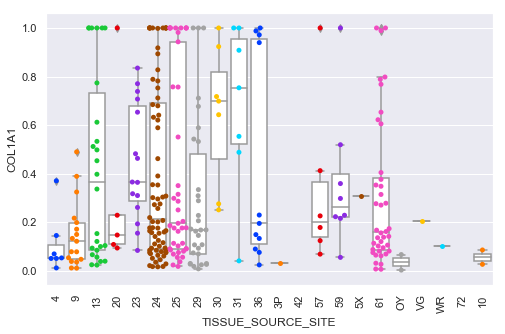

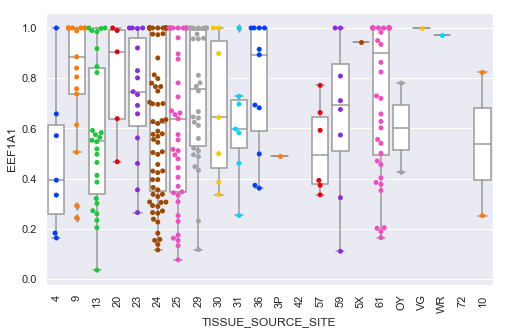

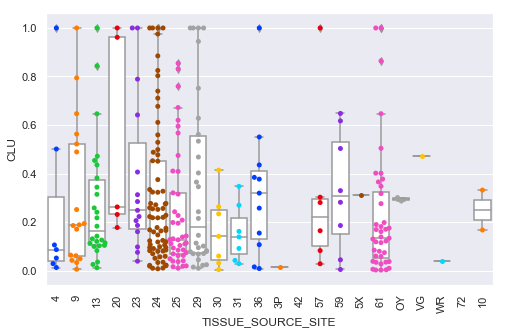

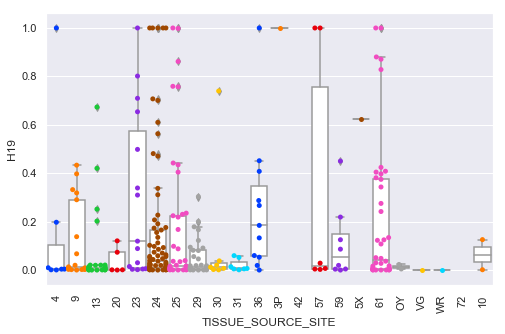

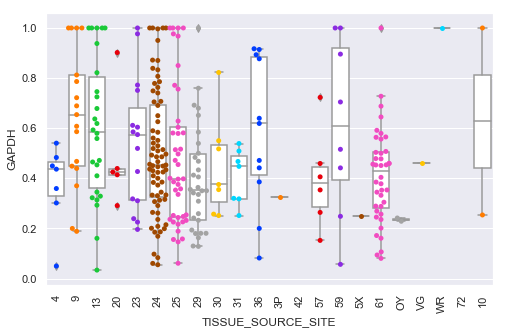

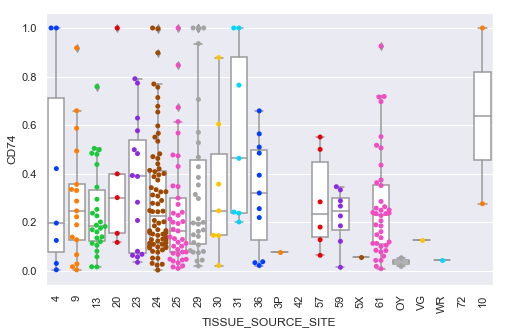

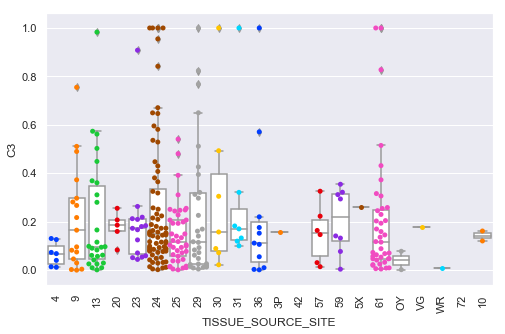

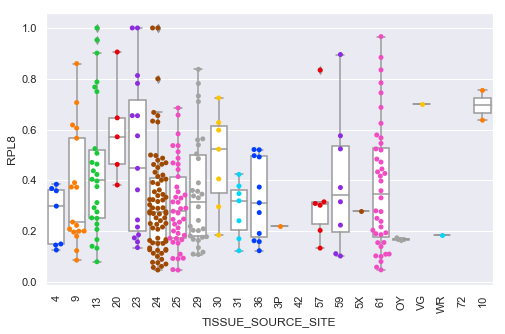

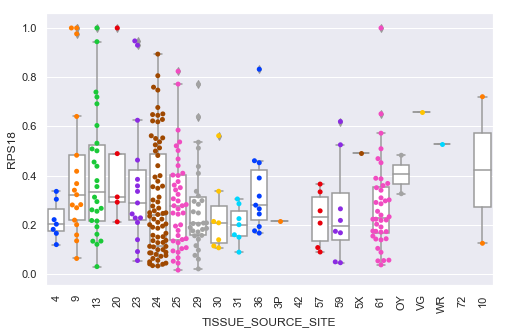

In [269]:
scater_box_plot(clinical, top10_genes, 'TISSUE_SOURCE_SITE')

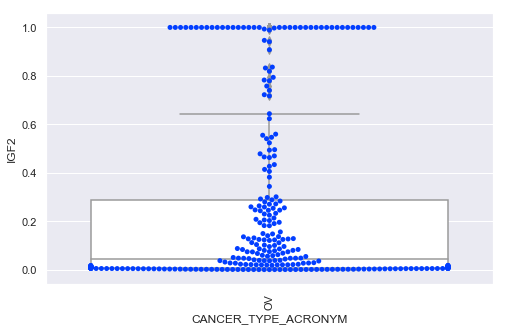

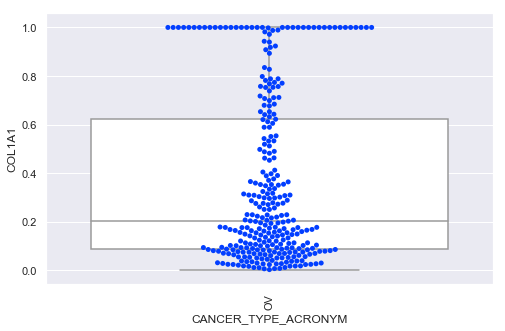

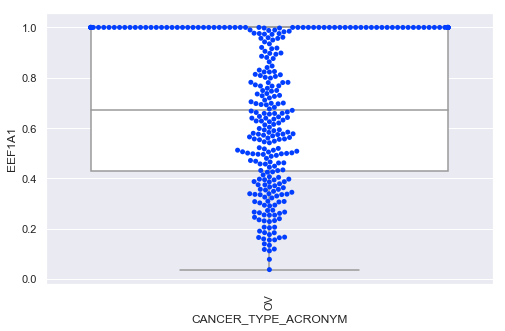

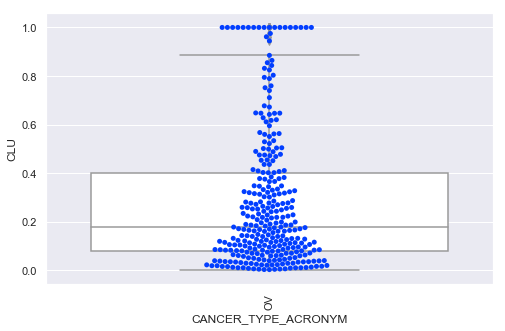

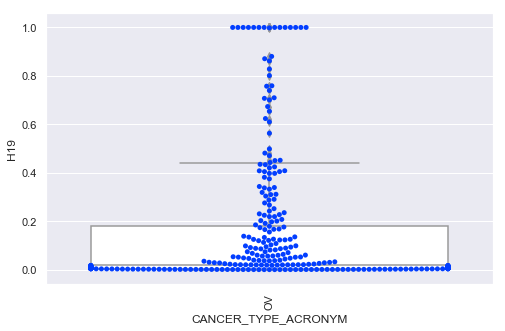

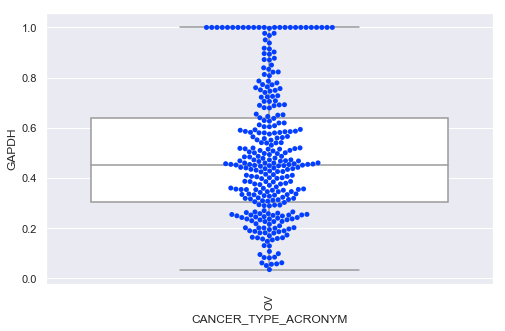

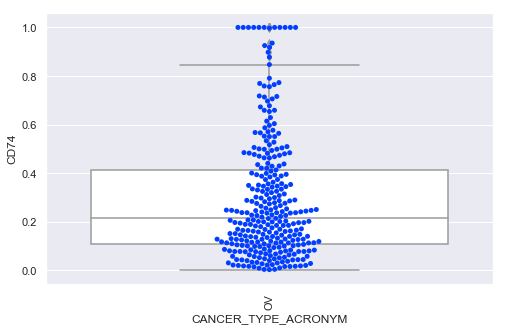

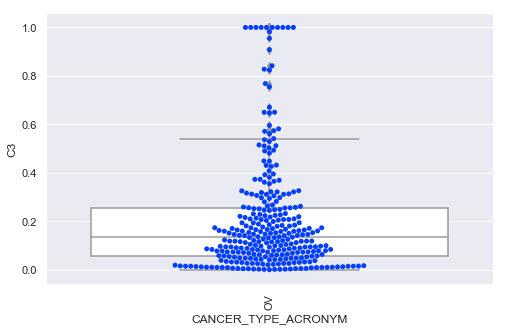

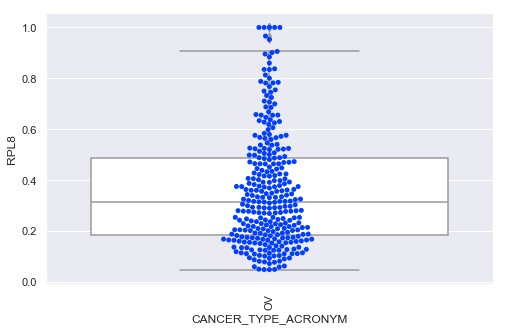

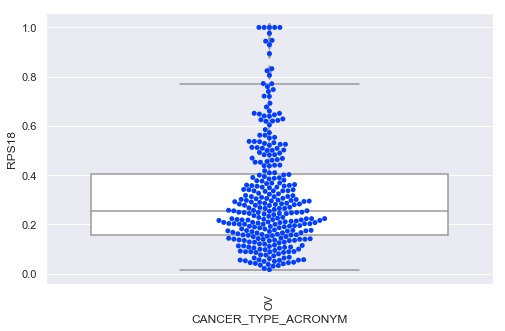

In [270]:
scater_box_plot(clinical, top10_genes, 'CANCER_TYPE_ACRONYM')

In [ ]:
scater_box_plot(clinical, top10_genes, 'ICD_O_3_HISTOLOGY', hue='SUBTYPE')

In [ ]:
scater_box_plot(clinical, top10_genes, 'ICD_O_3_SITE', hue='SUBTYPE')

In [ ]:
scater_box_plot(clinical, top10_genes, 'NEW_TUMOR_EVENT_AFTER_INITIAL_TREATMENT', hue='SUBTYPE')

In [ ]:
scater_box_plot(clinical, top10_genes, 'PERSON_NEOPLASM_CANCER_STATUS', hue='SUBTYPE')

In [ ]:
scater_box_plot(clinical, top10_genes, 'RACE', hue='SUBTYPE')

In [ ]:
scater_box_plot(clinical, top10_genes, 'AGE', hue='SUBTYPE')

In [ ]:
for gene in top10_genes:
    sns.scatterplot(x= clinical['DAYS_TO_BIRTH'], y = clinical[gene], hue=clinical['SUBTYPE'])
    plt.show()